Regularizadores: Penalizar los coeficientes en un problema de regresion para evitar el sobre ajuste y generalizar el modelo para nuevos datos. 

Conocer Normas L1 y L2, Ridge,Lasso y Elastic Net

Pasos estandares para solucionar un problema de machine learning.

Dividir conjunto de datos en cuatro objetos
    Entrenamiento X, Validacion X, Entrenamiento Vector Y, Validacion Vector Y.
    
Entrenar: SELECCIONAR una funcion de prediccion y observar su comportamiento

Predecir:En base a lo anterior debemos observar el comportamiento de nuevos atributos

Evaluar: se calcula la diferencia del valor predicho con el real usando MSE

Evaluamos para identificar problemas de sub ajuste y sobre ajuste.

Sub ajuste presenta: alto sesgo, menor capacidad explicativa de la muestra, mejores chances de ser generalizable.

Overfit: Presenta una alta varianza. (Forma funcional acoplada a los datos)
Mayor capacidad explicativa en la muestra especifica.
Tiene pocas chances de ser generalizable.

Regresion lineal: para obtener recta implementamos MCO (minimos cuadrados ordinarios) OLS es su nombre en ingles.

de esta manera nos aseguramos que las estimaciones sean ELIO (Gauss–Markov)
OLS nos asegura que las predicciones sean linealmente insesgadas y optimas


por que regularizar. r: tenemos parametros estimables que pueden tener un peso exagerado en entrenamiento. - permite seleccionar de mejor manera los atributos a utilizar.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from cv_error import *
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.drop(['zipcode','id','date'], axis=1, inplace=True)

In [4]:
print(f'numero filas: {df.shape[0]}')
print(f'numero columnas: {df.shape[1]}')

numero filas: 21613
numero columnas: 18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

Text(0.5, 1.0, 'histograma log precio')

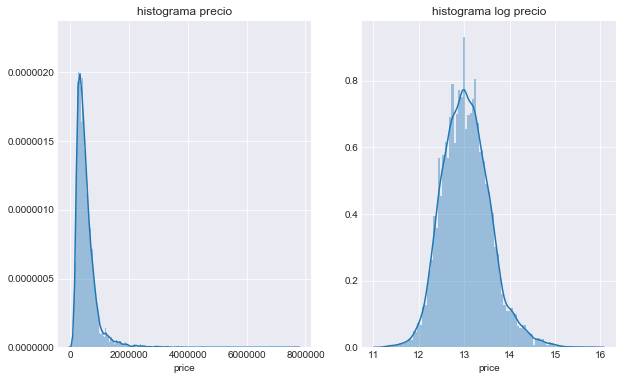

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
fig, ax = plt.subplots(1, 2)
sns.distplot(df['price'], bins='fd', ax=ax[0])
ax[0].set_title('histograma precio')
sns.distplot(df_scaled['price'], bins='fd', ax=ax[1])
ax[1].set_title('histograma log precio')

Primero se estandarizan los valores, y se aplica log cuando es necesario.


Ahora aplicaremos una regresion ridge. 

A continuacion se muestra como encontrar el mejor hiper parametro


no existe una regla clara pero se debe probar varias combinaciones. tenemos solo el hiper parametro que regula la superficie de penalizacion. Iremos probando varios lambda y validaremos de forma cruzada el mse o la metrica de desempeño deseada.

In [61]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error

In [8]:
X = df_scaled.iloc[:,1:] #creo un sub dataframe que contiene todas las columnas salvo los precios
N = X.shape[0] #almaceno en una variable el numero de filas
X.insert(X.shape[1],'intercept',np.ones(N)) #Agrego una columna llamada intercepto que contiene solo unos
y=df_scaled['price'] #creo un sub data frame que solo contiene la columna precio
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.33, random_state=63)

In [9]:
y_train.shape

(14480,)

In [10]:
X_train.shape

(14480, 18)

In [11]:
X

bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0     -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   -0.087173   
1     -0.398737   0.175607     0.533634 -0.189885  0.936506   -0.087173   
2     -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   -0.087173   
3      0.676485   1.149449    -0.130550 -0.244014 -0.915427   -0.087173   
4     -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   -0.087173   
...         ...        ...          ...       ...       ...         ...   
21608 -0.398737   0.500221    -0.598746 -0.337424  2.788439   -0.087173   
21609  0.676485   0.500221     0.250539 -0.224386  0.936506   -0.087173   
21610 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   -0.087173   
21611 -0.398737   0.500221    -0.522528 -0.307076  0.936506   -0.087173   
21612 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   -0.087173   

           view  condition     grade  sqft_above  sqft_basement  yr_built  \
0     -0.305759  -0.629187 -0.558836   -0.734708      -0.658681 -0.544898   
1     -0.305759  -0.629187 -0.558836    0.460841       0.245141 -0.681079   
2     -0.305759  -0.629187 -1.409587   -1.229834      -0.658681 -1.293892   
3     -0.305759   2.444294 -0.558836   -0.891699       1.397515 -0.204446   
4     -0.305759  -0.629187  0.291916   -0.130895      -0.658681  0.544548   
...         ...        ...       ...         ...            ...       ...   
21608 -0.305759  -0.629187  0.291916   -0.312039      -0.658681  1.293542   
21609 -0.305759  -0.629187  0.291916    0.629908      -0.658681  1.463768   
21610 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681  1.293542   
21611 -0.305759  -0.629187  0.291916   -0.227505      -0.658681  1.123316   
21612 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681  1.259497   

       yr_renovated       lat      long  sqft_living15  sqft_lot15  intercept  
0         -0.210128 -0.352572 -0.306079      -0.943355   -0.260715        1.0  
1          4.746678  1.161568 -0.746341      -0.432686   -0.187868        1.0  
2         -0.210128  1.283537 -0.135655       1.070140   -0.172375        1.0  
3         -0.210128 -0.283288 -1.271816      -0.914174   -0.284522        1.0  
4         -0.210128  0.409550  1.199335      -0.272190   -0.192849        1.0  
...             ...       ...       ...            ...         ...        ...  
21608     -0.210128  1.004958 -0.938069      -0.666135   -0.412381        1.0  
21609     -0.210128 -0.356180 -1.051685      -0.228419   -0.203946        1.0  
21610     -0.210128  0.247888 -0.604321      -1.410253   -0.394141        1.0  
21611     -0.210128 -0.184414  1.028910      -0.841221   -0.420511        1.0  
21612     -0.210128  0.245723 -0.604321      -1.410253   -0.417948        1.0  

[21613 rows x 18 columns]

In [12]:
alphas= np.logspace(0,7,base=10)

In [13]:
alphas

array([1.00000000e+00, 1.38949549e+00, 1.93069773e+00, 2.68269580e+00,
       3.72759372e+00, 5.17947468e+00, 7.19685673e+00, 1.00000000e+01,
       1.38949549e+01, 1.93069773e+01, 2.68269580e+01, 3.72759372e+01,
       5.17947468e+01, 7.19685673e+01, 1.00000000e+02, 1.38949549e+02,
       1.93069773e+02, 2.68269580e+02, 3.72759372e+02, 5.17947468e+02,
       7.19685673e+02, 1.00000000e+03, 1.38949549e+03, 1.93069773e+03,
       2.68269580e+03, 3.72759372e+03, 5.17947468e+03, 7.19685673e+03,
       1.00000000e+04, 1.38949549e+04, 1.93069773e+04, 2.68269580e+04,
       3.72759372e+04, 5.17947468e+04, 7.19685673e+04, 1.00000000e+05,
       1.38949549e+05, 1.93069773e+05, 2.68269580e+05, 3.72759372e+05,
       5.17947468e+05, 7.19685673e+05, 1.00000000e+06, 1.38949549e+06,
       1.93069773e+06, 2.68269580e+06, 3.72759372e+06, 5.17947468e+06,
       7.19685673e+06, 1.00000000e+07])

Alpha se conoce como el parametro de regularizacion, lo que en la teoria se llama lambda

In [14]:
names_regressors = X_train.columns #guardamos los nombres de los regresores

In [15]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'intercept'],
      dtype='object')

In [16]:
coefs_ridge, cv_err_ridge = [], [] #se generan dos objetos, el primero contiene los coeficientes ridge, y un error de validacion cruzada que se estima a mano en el archivo auxiliar
model_ridge = Ridge (fit_intercept=True)

for a in alphas: # para cada uno de los valores de alpha haremos los siguiente
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train,y_train)
    coefs_ridge.append(model_ridge.coef_)
    dummy, cv_err_estimates = cv_error(X_train, y_train, k = 10, method = 'ridge', alpha=a)  
    #guardamos 2 elementos, el coeficiente de nuestro modelo regularizado y el error de validacion cruzada de cada modelo
    cv_err_ridge.append(np.mean(cv_err_estimates))

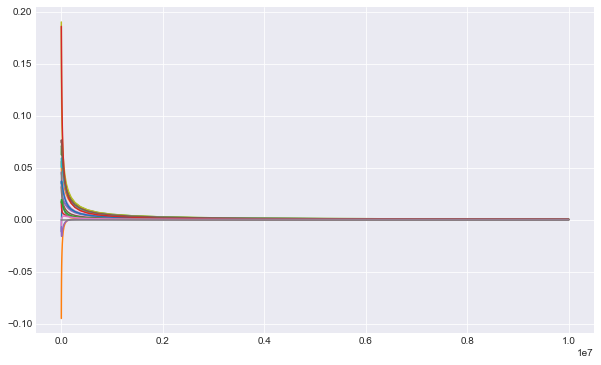

In [17]:
ax=plt.gca()
for y_arr,label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label=label)

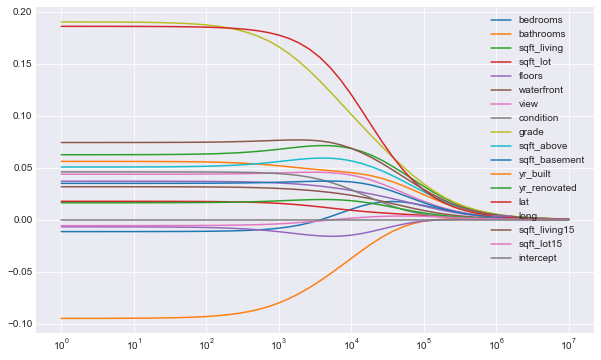

In [18]:
ax=plt.gca()
for y_arr,label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label=label)

ax.set_xscale('log')
plt.legend(loc=1)

visualizacion de cada coeficiente

y=valores coeficiente 

x=valor lambda 

a medida que lambda aumenta, el coeficiente tiende a ser menor.

Ahora debemos determinar cual será el mejor elemento. o el mejor lambda para generar la mejor regularizacion del modelo


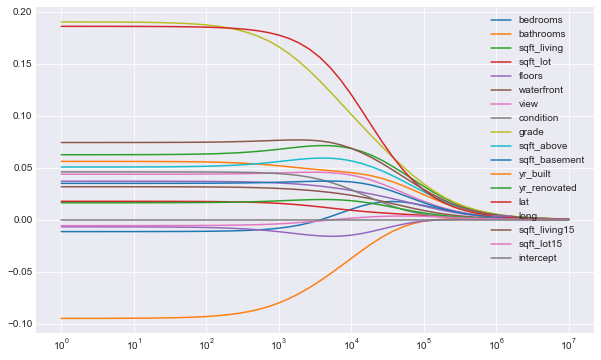

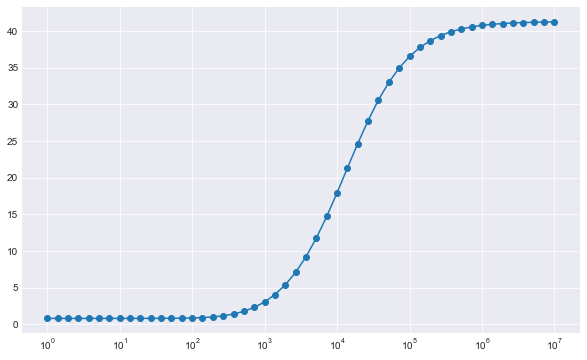

In [19]:
ax=plt.gca()
for y_arr,label in zip(np.squeeze(coefs_ridge).T, names_regressors):
    plt.plot(alphas, y_arr, label=label)

ax.set_xscale('log')
plt.legend(loc=1)
plt.show()

###
ax  = plt.gca()
plt.plot(alphas, np.sqrt(cv_err_ridge), 'o-')
ax.set_xscale('log')

Se debe encontrar un punto en que lambda se comporta de manera eficiente 

skit learn tiene un metodo que nos ayuda a elegir el mejor hiper parametro

In [20]:
ridge_cv = RidgeCV(cv=10) #cv = cross validation+
model_ridge = ridge_cv.fit(X_train,y_train)
model_ridge.alpha_

10.0

alpha 10 es el mejor hiper parametro que regulariza nuestro modelo de regresion. esto se guia en base al early stopping = maximo parametro antes que la funcion sea ineficiente

a continuacion se puede ver el comportamiento de cada regresor en base al mejor alpha

In [21]:
model_ridge.coef_

array([-0.01152051,  0.05594325,  0.06247254,  0.01758403,  0.03688535,
        0.03158963,  0.04366224,  0.04588752,  0.18988215,  0.05064816,
        0.03487782, -0.09486206,  0.01621742,  0.18580857, -0.00701508,
        0.07418383, -0.00576774,  0.        ])

Se evaluará el comportamiento del mejor hiper parametro.



In [22]:
from sklearn.metrics import r2_score
print(r2_score(model_ridge.predict(X_test),y_test))

0.698836362365816


el coeficiente de determinacion dice que con un hiperparametro lambda 10 nuestro modelo tendrá un 70% de predecir o explicar la varianza de los puntajes de nuestro vector objetivo en validacion



A continuacion evaluaremos Lasso, el cual es capaz de descartar atributos

In [62]:
def regression_regularizada(df_method,vector_objetivo,test_size,random_state,log_alpha_start,log_alpha_end,log_alpha_base,k,method):
    work_df=df_method
    vo=vector_objetivo
    df_vo=work_df[vector_objetivo]
    df_stg=work_df.copy()
    df_stg.drop([vector_objetivo], axis=1, inplace=True)
    df_reg=df_stg
    
    X = df_reg #creo un sub dataframe que contiene todas las columnas salvo los precios
    N = X.shape[0] #almaceno en una variable el numero de filas
    X.insert(X.shape[1],'intercept',np.ones(N)) #Agrego una columna llamada intercepto que contiene solo unos
    y=df_vo #creo un sub data frame que solo contiene la columna precio
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)
    alphas= np.logspace(log_alpha_start,log_alpha_end,base=log_alpha_base)
    names_regressors = X_train.columns #guardamos los nombres de los regresores
    coefs_ridge, cv_err_ridge = [], [] #se generan dos objetos, el primero contiene los coeficientes ridge, y un error de validacion cruzada que se estima a mano en el archivo auxiliar
    
    if method=='ridge':
        model_ridge = Ridge (fit_intercept=True)
        model_method=model_ridge
    if method=='lasso':
        model_ridge = Lasso (fit_intercept=True)
        model_method=model_ridge        
    if method=='enet':
        model_ridge = ElasticNet (fit_intercept=True)
        model_method=model_ridge  
        
    for a in alphas: # para cada uno de los valores de alpha haremos los siguiente
        model_method.set_params(alpha=a)
        model_method.fit(X_train,y_train)
        coefs_ridge.append(model_method.coef_)
        dummy, cv_err_estimates = cv_error(X_train, y_train, k = k, method = method, alpha=a)  
        #guardamos 2 elementos, el coeficiente de nuestro modelo regularizado y el error de validacion cruzada de cada modelo
        cv_err_ridge.append(np.mean(cv_err_estimates))
    ax=plt.gca()
    for y_arr,label in zip(np.squeeze(coefs_ridge).T, names_regressors):
        plt.plot(alphas, y_arr, label=label)
    ax.set_xscale('log')
    plt.legend(loc=1)
    plt.show()
    ###
    ax  = plt.gca()
    plt.plot(alphas, np.sqrt(cv_err_ridge), 'o-')
    ax.set_xscale('log')
    plt.show()

    
    if method=='ridge':
        ridge_cv = RidgeCV(cv=10) #cv = cross validation+
        model_ridge = ridge_cv.fit(X_train,y_train)
        print(f'best alpha: {model_ridge.alpha_}')
        print('\n')
        print(f'coefs: {model_ridge.coef_}')
        r2_score_number=r2_score(model_ridge.predict(X_test),y_test)
        print(f'el coeficiente de determinacion dice que con un hiperparametro lambda {model_ridge.alpha_} nuestro modelo tendrá un {r2_score_number*100}% de predecir o explicar la varianza de los puntajes de nuestro vector objetivo en validacion')
    if method=='lasso':
        lasso_cv = LassoCV() #cv = cross validation+
        model_lasso = lasso_cv.fit(X_train,y_train)
        print(f'best alpha: {model_lasso.alpha_}')
        print('\n')
        print(f'coefs: {model_lasso.coef_}')
        r2_score_number=r2_score(model_lasso.predict(X_test),y_test)
        print(f'el coeficiente de determinacion dice que con un hiperparametro lambda {model_lasso.alpha_} nuestro modelo tendrá un {r2_score_number*100}% de predecir o explicar la varianza de los puntajes de nuestro vector objetivo en validacion')
    if method=='enet':
        enet_cv = ElasticNetCV() #cv = cross validation+
        model_enet = enet_cv.fit(X_train,y_train)
        print(f'best alpha: {model_enet.alpha_}')
        print('\n')
        print(f'coefs: {model_enet.coef_}')
        r2_score_number=r2_score(model_enet.predict(X_test),y_test)
        print(f'el coeficiente de determinacion dice que con un hiperparametro lambda {model_enet.alpha_} nuestro modelo tendrá un {r2_score_number*100}% de predecir o explicar la varianza de los puntajes de nuestro vector objetivo en validacion')




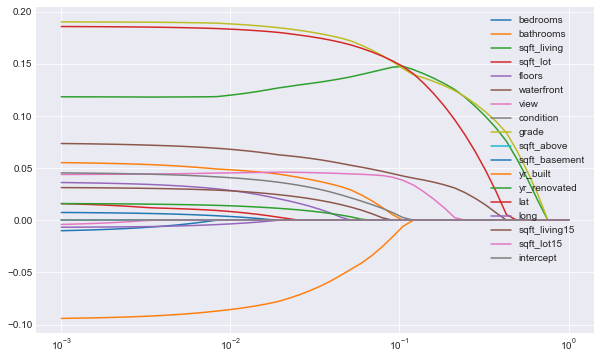

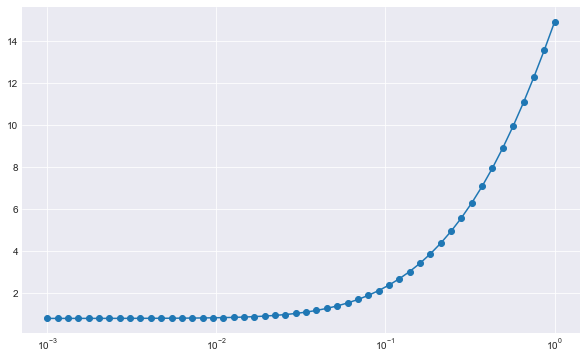

best alpha: 0.0011458323559966422


coefs: [-0.00983557  0.05508438  0.11827135  0.01563804  0.03600339  0.03122994
  0.04385589  0.04528151  0.19004942  0.          0.00737125 -0.09395718
  0.01591697  0.18560794 -0.00665977  0.07340372 -0.00379035  0.        ]
el coeficiente de determinacion dice que con un hiperparametro lambda 0.0011458323559966422 nuestro modelo tendrá un 69.73359698209165% de predecir o explicar la varianza de los puntajes de nuestro vector objetivo en validacion


In [63]:
regression_regularizada(df_scaled,'price',.33,63,0,-3,10,10,'enet')